## Linear Dependence in Word Embeddings

In linear algebra, a set of vectors is said to be **linearly dependent** if one of them can be written as a linear combination of the others.  
Formally, vectors $(v_1, v_2, \dots, v_n)$ are linearly dependent if there exist scalars $(a_1, a_2, \dots, a_n)$, *not all zero*, such that:

$$
a_1 v_1 + a_2 v_2 + \cdots + a_n v_n = 0
$$




This idea may sound abstract, but it has powerful applications.  
In **Natural Language Processing (NLP)**, words are represented as **vectors in a high-dimensional space**.  
These vectors often show meaningful **linear relationships**.  

For example:

$$
\text{king} - \text{man} + \text{woman} \approx \text{queen}
$$
This is a real-world case where linear combinations of word vectors capture semantic relationships.  
In this demo, we’ll see how linear dependence and linear combinations appear naturally in NLP through **word embeddings**.


### Word Embedding Models: Word2Vec and GloVe

Before diving into vectors, let’s clarify what **Word2Vec** and **GloVe** mean.

- **Word2Vec** (Google, 2013)  
  - Learns embeddings by predicting the context of a word in a sentence.  
  - Idea: *“You shall know a word by the company it keeps.”*  
  - For example, "cat" and "dog" appear in similar contexts, so their vectors end up close in space.

- **GloVe** (Stanford, 2014 — Global Vectors)  
  - Uses word **co-occurrence statistics** across the entire corpus.  
  - Captures ratios of probabilities, so it encodes semantic relationships like:  
    $$
    \text{king} - \text{man} + \text{woman} \approx \text{queen}
    $$

Both approaches give us a **vector space of words** where linear algebra operations reveal hidden semantic structure.  

In this demo, we are using **GloVe (glove-wiki-gigaword-50)**:  
- Trained on Wikipedia + news text.  
- Each word → 50-dimensional vector.  
- Lightweight but good enough to demonstrate **linear dependence and combinations**.

Next, let’s take a peek at the vector for a specific word, like **"king"**.


In [23]:
# Load pretrained embeddings (GloVe 50D)
import gensim.downloader as api

# Download and load the small GloVe model
model = api.load("glove-wiki-gigaword-50")

print("Pretrained embeddings loaded.")
print("Vocabulary size:", len(model.key_to_index))
print("Vector dimension:", model.vector_size)


Pretrained embeddings loaded.
Vocabulary size: 400000
Vector dimension: 50


In [25]:
vector_king = model["king"]
print("Vector for 'king':\n", vector_king)
print("Dimension:", len(vector_king))


Vector for 'king':
 [ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012  -0.076666  1.493    -0.034189 -0.98173
  0.68229   0.81722  -0.51874  -0.31503  -0.55809   0.66421   0.1961
 -0.13495  -0.11476  -0.30344   0.41177  -2.223    -1.0756   -1.0783
 -0.34354   0.33505   1.9927   -0.04234  -0.64319   0.71125   0.49159
  0.16754   0.34344  -0.25663  -0.8523    0.1661    0.40102   1.1685
 -1.0137   -0.21585  -0.15155   0.78321  -0.91241  -1.6106   -0.64426
 -0.51042 ]
Dimension: 50


### What does the vector mean?

Here we see the word **"king"** represented as a 50-dimensional vector:

$$
[0.50, \; 0.68, \; -0.59, \; -0.02, \; \dots, \; -0.51]
$$

- Each number is a coordinate along one axis in a 50-dimensional space.  
- Just like in 2D or 3D, the vector tells us **where the word is located** in this high-dimensional space.  
- The individual numbers don’t mean much on their own, but **relationships between vectors** carry meaning.

For example, if two words appear in similar contexts (like *dog* and *cat*), their vectors will be **close together**.  
If words differ systematically (like *man* vs *woman*), that difference shows up as a **direction in the vector space**.

This is where **linear dependence and combinations** come in:  
we can add, subtract, and compare word vectors just like any other vectors in linear algebra.


In [28]:
# Find words most similar to "king"
similar_words = model.most_similar("king", topn=5)

print("Top 5 words similar to 'king':")
for word, score in similar_words:
    print(f"{word}: {score:.3f}")


Top 5 words similar to 'king':
prince: 0.824
queen: 0.784
ii: 0.775
emperor: 0.774
son: 0.767


### Similarity in the Embedding Space

The model tells us that the words **closest** to "king" are:

- prince (0.82)  
- queen (0.78)  
- emperor (0.77)  
- son (0.76)  

These similarity scores come from **cosine similarity** between vectors.  
- Cosine similarity measures the **angle** between two vectors.  
- If the angle is small (vectors point in a similar direction), the words are considered semantically similar.  

In other words, words that appear in similar contexts in the training data  
(*"king"* and *"prince"*, or *"king"* and *"queen"*)  
end up **near each other** in this high-dimensional vector space.

This shows how **linear algebra concepts like dot products and vector angles** are used in NLP.


In [31]:
import numpy as np

v = model["king"] - model["man"] + model["woman"]

# Inspect the derived vector
print("Dimension of v:", v.shape[0])
print("First 10 coordinates of v:\n", np.round(v[:10], 6))

# Find nearest words to this *vector* (not to a word key)
nearest = model.similar_by_vector(v, topn=10)
print("\nTop 10 nearest words to (king - man + woman):")
for w, s in nearest:
    print(f"{w}: {s:.3f}")

# (Optional sanity) Compare cosine with a few candidates explicitly
def cosine(u, w):
    return float(np.dot(u, w) / (np.linalg.norm(u) * np.linalg.norm(w)))

cand = ["queen", "prince", "throne", "daughter", "elizabeth"]
print("\nCosine similarity of v with specific candidates:")
for c in cand:
    print(f"{c}: {cosine(v, model[c]):.3f}")


Dimension of v: 50
First 10 coordinates of v:
 [ 0.417366  0.90427  -1.00503  -0.062021  0.49726   0.80667  -0.14855
  0.80365  -0.15654  -0.66974 ]

Top 10 nearest words to (king - man + woman):
king: 0.886
queen: 0.861
daughter: 0.768
prince: 0.764
throne: 0.763
princess: 0.751
elizabeth: 0.751
father: 0.731
kingdom: 0.730
mother: 0.728

Cosine similarity of v with specific candidates:
queen: 0.861
prince: 0.764
throne: 0.763
daughter: 0.768
elizabeth: 0.751


### Linear Combinations in Action

Our calculation:

$$
\text{king} - \text{man} + \text{woman} \approx \text{queen}
$$

worked beautifully!

But what’s really happening?

- Each word is a vector in a **high-dimensional space**.  
- Subtracting **"man"** from **"king"** gives us the "royalty without gender" direction.  
- Adding **"woman"** moves us along the "female" direction.  
- The resulting vector points closest to **"queen"** in the embedding space.

This is a perfect example of how **linear algebra concepts**—linear combinations and directions in vector spaces—can capture semantic meaning in natural language.

It also shows that the vectors are not random:  
they encode **structured dependencies** that let us move through the space in meaningful ways.


In [34]:
# Analogy: cricket - India + United_States
result = model.most_similar(positive=["cricket", "america"], negative=["india"], topn=10)

for word, score in result:
    print(f"{word}: {score:.4f}")


baseball: 0.7155
football: 0.6964
soccer: 0.6914
club: 0.6614
franchise: 0.6608
sports: 0.6593
league: 0.6420
fame: 0.6336
nfl: 0.6295
leagues: 0.6282


## Visualizing Word Embeddings as Vectors

Word embeddings map words to high-dimensional vectors.  
We can use **dimensionality reduction** to project them into 2D space for visualization:

- The query `cricket - India + USA` produces a vector in embedding space.
- We will plot the original words and the resulting similar words as points.
- The relative positions illustrate **semantic relationships** between words as geometric relationships.


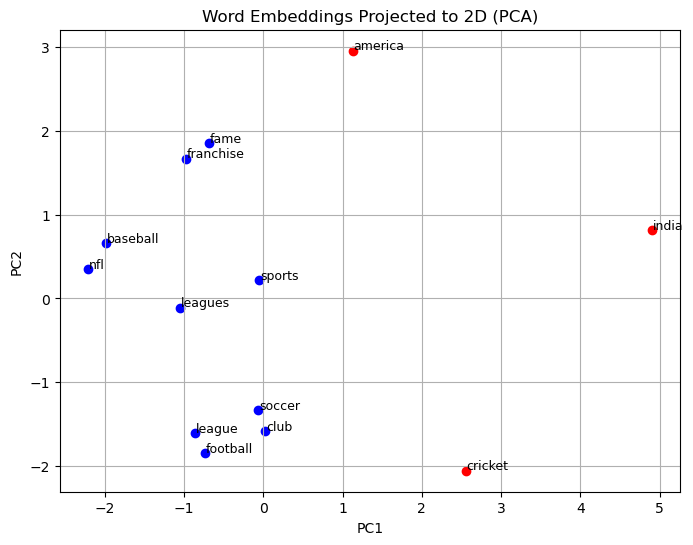

In [37]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Words to visualize
words_to_plot = ["cricket", "india", "america"] + [word for word, _ in result]

# Get embeddings
word_vectors = [model[word] for word in words_to_plot]

# Reduce to 2D using PCA
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(word_vectors)

# Plot
plt.figure(figsize=(8,6))
for i, word in enumerate(words_to_plot):
    x, y = vectors_2d[i]
    plt.scatter(x, y, marker='o', color='red' if word in ["cricket", "india", "america"] else 'blue')
    plt.text(x+0.01, y+0.01, word, fontsize=9)

plt.title("Word Embeddings Projected to 2D (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()
